In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x7f0a43d5c5c8>

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=888,
  image_size=(img_height, img_width))

#main_directory/
#...class_a/
#......a_image_1.jpg
#......a_image_2.jpg
#...class_b/
#......b_image_1.jpg
#......b_image_2.jpg

#directory：數據來源
#labels：如果設定inferred，則會根據資料夾名稱當作標籤
#label_mode：分為int、categorical、binary
#分別對應損失準則sparse_categorical_crossentropy、categorical_crossentropy、binary_crossentropy
#class_names:可指定標籤名稱或使用inferred自動處理
#color_mode：支援"grayscale", "rgb", "rgba".預設"rgb"
#batch_size：預設32
#image_size：預設(256, 256)，可指定圖片大小
#shuffle：隨機排序資料
#seed：隨機種子
#validation_split：介於0~1之前指定測試資料，通常設定0.2,0.3,0.4
#subset：指定用途，參數只有"training" 或 "validation"
#interpolation：可指應調整圖片大小時的插補方法
#follow_links：預設為Flase，是否以參照方式訪問子目錄

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


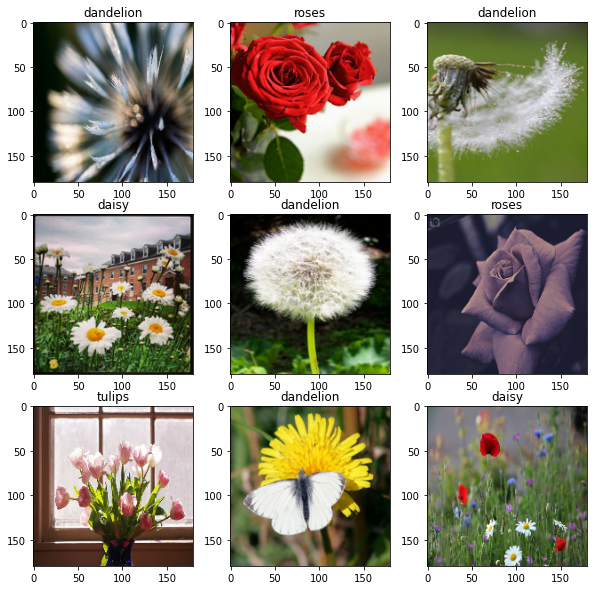

In [ ]:
plt.figure(figsize=(10, 10)) #圖型大小、英寸
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1) #行數=3 , 列數=3, 呈現的子圖i+1
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])